##### Singular Value Decomposition:


SVD theorem states that any matrix A can be decomposed into three matrices U, sigma, V such that
    <br><center><bold>`A =  UΣV^T`<center><bold/>
Where A is mxn, U is mxm, Σ is mxn, and U is nxn
When you take a dot product of U.Sigma.V_transpose, you get back the original matrix A. 
U and V are known as unitary matrix in linear algebric terms. 
    U and V matrices obtained from SVD are always orthogonal. They preserves length , preserves angles and do not magnify errors. A matrix is orthogonal when it's transpose is equal to it's inverse.


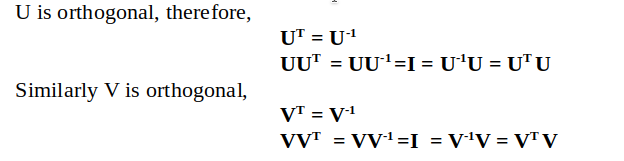

numpy.linalg class has methods to calculate the SVD and eigenvalues directly for a given matrix but with slightly different notation which may sound confusing to you.
When you call svd() function, it returns three matrices, where U and V_transpose are the same matrix as defined in the theorem but Σ is a one-dimensional array containing the singular values or squares of eigenvalues. Therefore when you multiply these returned matrices, you don't get back the original matrix and you get errors most of the time as these returned matrices differ in order and hence can not be multiplied.
Consider below example:

In [49]:
import numpy as np
A = np.array([[1,4,1],[-4,-7,1]], dtype = float)
U, Σ_array, V_transpose = np.linalg.svd(A)

print("U shape:{}, Σ_array shape:{}, and V_transpose shape:{}".format(U.shape, Σ_array.shape, V_transpose.shape))
print("U is:\n{},\n Σ_array is:\n {},\n and V_transpose is:\n {}".format(U, Σ_array, V_transpose))

U shape:(2, 2), Σ_array shape:(2,), and V_transpose shape:(3, 3)
U is:
[[-0.440356    0.89782325]
 [ 0.89782325  0.440356  ]],
 Σ_array is:
 [9.01135903 1.6719475 ],
 and V_transpose is:
 [[-0.44739634 -0.89289382  0.05076562]
 [-0.51652383  0.3043164   0.80037157]
 [ 0.73009564 -0.33186166  0.59735098]]


In [50]:
U@Σ_array@V_transpose

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

Now, our task is to obtain Σ from Σ_array. As we know Σ is mxn matrix. The values of Σ_array are the diagonal elements of Σ. Therefore we will first initialize the Σ of size mxn with all zeroes and then form the diagonal matrix of Σ_array and then assign it to Σ's top square matrix. 

In [51]:
m = A.shape[0]
n = A.shape[1]
Σ = np.zeros((m,n))
Σ[0: len(Σ_array), 0: len(Σ_array)] =  np.diag(Σ_array)
print(Σ)

[[9.01135903 0.         0.        ]
 [0.         1.6719475  0.        ]]


Now we can multiply u, Σ, and v_transpose and we will get back the original matrix A:

In [52]:
print("Matrix constructed from original matrix:\n {}".format(U@Σ@V_transpose))
print("Original Matrix:\n{}".format(A))

Matrix constructed from original matrix:
 [[ 1.  4.  1.]
 [-4. -7.  1.]]
Original Matrix:
[[ 1.  4.  1.]
 [-4. -7.  1.]]


We know that U and V are orthogonal matrices therefore using their characteristics, we can SVD decomposition problem is transformed into an eigenvalue and eigenvector problem. Therefore we can find U and V matrices using eigenvalues and eigenvectors.

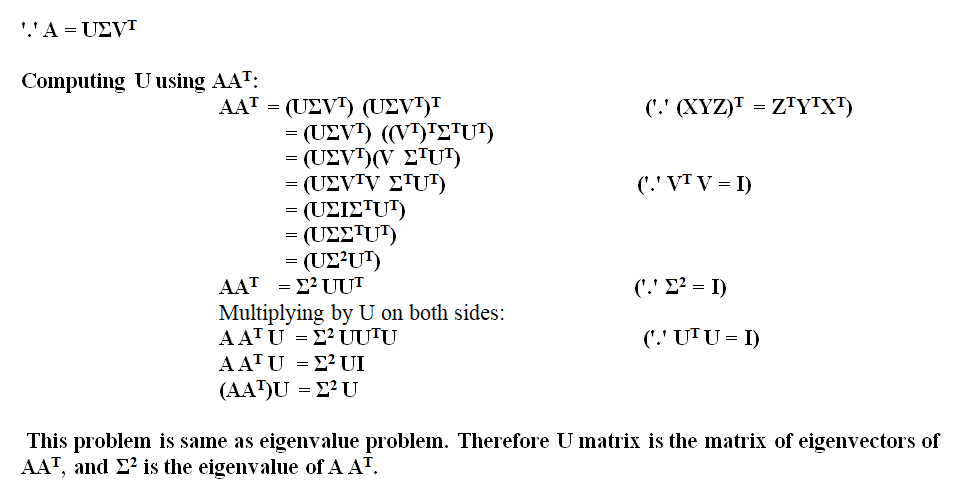

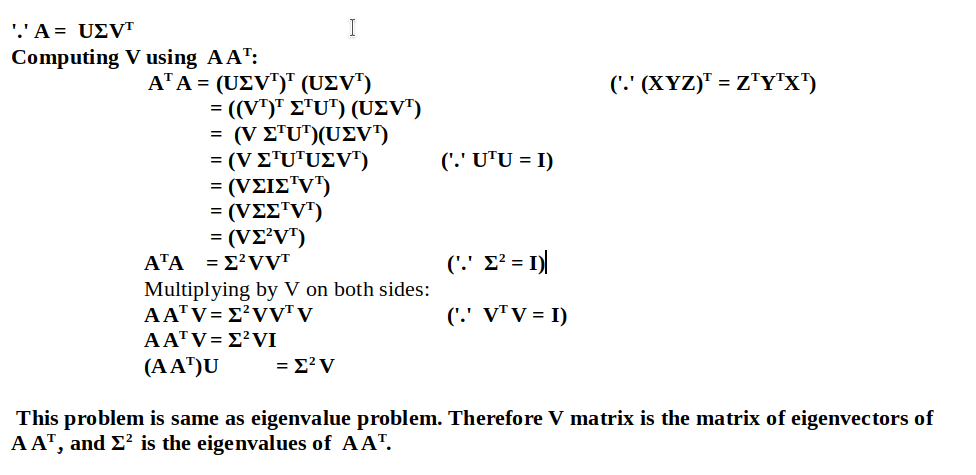

In [53]:
eigen_values_U, eigen_vectors_U = np.linalg.eig(np.dot(A, A.T))  # gives U
# Sorting eigen_values_U and eigen_vectors_U in descending order of eigen_values_U
idx = eigen_values_U.argsort()[::-1]   
eigen_values_U = eigen_values_U[idx]
eigen_vectors_U = eigen_vectors_U[:,idx]
print("eigen_values_U received from AA^T:\n{}".format(eigen_values_U))
print("eigen_vectors_U received from AA^T:\n{} which is same as U obtained in SVD except in sign:\n{}".format(eigen_vectors_U, U))

# Note: U_ received from eignevectors of AA_transpose are rearranged to get U in SVD equation such that the eigenvectors  are
# arranged in decreasing order of eigenvalues

eigen_values_U received from AA^T:
[81.20459157  2.79540843]
eigen_vectors_U received from AA^T:
[[ 0.440356   -0.89782325]
 [-0.89782325 -0.440356  ]] which is same as U obtained in SVD except in sign:
[[-0.440356    0.89782325]
 [ 0.89782325  0.440356  ]]


In [54]:
eigen_values_V, eigen_vectors_V = np.linalg.eig(np.dot(A.T, A)) # gives V
# Sorting eigen_values_V and eigen_vectors_V in descending order of eigen_values_U
idx = eigen_values_V.argsort()[::-1]   
eigen_values_V = eigen_values_V[idx]
eigen_vectors_V = eigen_vectors_V[:,idx]
print("eigen_values_V received from A^TA:\n{}".format(eigen_values_V))
print("eigen_vectors_V received from A^TA:\n{}".format(eigen_vectors_V))
print("SVD return V_transpose, therefore taking transpose of eigen_vectors_V:\n{} which is same as V_transpose obtained in SVD:\n{}".format(eigen_vectors_V.T, V_transpose))


eigen_values_V received from A^TA:
[8.12045916e+01 2.79540843e+00 3.72159364e-16]
eigen_vectors_V received from A^TA:
[[-0.44739634 -0.51652383 -0.73009564]
 [-0.89289382  0.3043164   0.33186166]
 [ 0.05076562  0.80037157 -0.59735098]]
SVD return V_transpose, therefore taking transpose of eigen_vectors_V:
[[-0.44739634 -0.89289382  0.05076562]
 [-0.51652383  0.3043164   0.80037157]
 [-0.73009564  0.33186166 -0.59735098]] which is same as V_transpose obtained in SVD:
[[-0.44739634 -0.89289382  0.05076562]
 [-0.51652383  0.3043164   0.80037157]
 [ 0.73009564 -0.33186166  0.59735098]]


Σ is diagonal matrix containing the singular values at diagonal which is  achieved by taking out the common eigenvalues of AA^T and A^TA arranged in decreasing order. 



In [55]:
Σ_array_cal = np.sqrt(eigen_values_V[:min(m,n)])
print("Σ_array_cal:{}\nis as same as Σ_array received from SVD() function of numpy:{}".format(Σ_array_cal, Σ_array))

Σ_array_cal:[9.01135903 1.6719475 ]
is as same as Σ_array received from SVD() function of numpy:[9.01135903 1.6719475 ]
